# Quarterly Data analysis (2023-Q1)

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocess


In [2]:
withdrawals_df = pd.read_json('user_withdrawals.json')
deposits_df = pd.read_json('user_deposits.json')

withdrawals_df['Type'] = 'withdraw'
deposits_df['Type'] = 'deposit'

df = pd.concat([withdrawals_df, deposits_df], ignore_index=True)

# Drop the 'type' attribute
df = df.drop('type', axis=1)

# Exploratry Data analysis

In [3]:
# Display the DataFrame
df.head()

,user_id,timezone,country,region,ip_address,organisation_id,entity,currency,amount,timestamp,equiv_sgd_amount,Type
0,1595209,Europe/Kyiv,UA,68,185.177.189.84,NaN,CA,XMR,0.173786,2023-01-13 08:31:07.030000+00:00,39.165921,withdraw
1,1596170,America/Phoenix,NG,NA,197.210.78.93,NaN,CA,XMR,1.046019,2023-03-11 00:11:49.759000+00:00,190.594931,withdraw
2,1601363,Asia/Riyadh,SA,NA,2a02:cb80:401c:c3f7:a86d:9890:41:7805,NaN,CA,XMR,0.199790,2023-03-11 10:52:09.309000+00:00,36.406404,withdraw
3,301198,Asia/Singapore,SG,N/A,118.189.67.127,NaN,SG,DAI,348.386847,2023-02-18 00:04:06.919000+00:00,465.864081,withdraw
4,1280557,Asia/Singapore,SG,NA,165.225.113.209,NaN,SG,DAI,8721.800216,2023-03-11 09:30:15.002000+00:00,11763.991625,withdraw


In [4]:
print(df.columns)

Index(['user_id', 'timezone', 'country', 'region', 'ip_address',
       'organisation_id', 'entity', 'currency', 'amount', 'timestamp',
       'equiv_sgd_amount', 'Type'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           1367 non-null   int64              
 1   timezone          1367 non-null   object             
 2   country           1367 non-null   object             
 3   region            1364 non-null   object             
 4   ip_address        1364 non-null   object             
 5   organisation_id   46 non-null     float64            
 6   entity            1367 non-null   object             
 7   currency          1367 non-null   object             
 8   amount            1367 non-null   float64            
 9   timestamp         1367 non-null   datetime64[ns, UTC]
 10  equiv_sgd_amount  1362 non-null   float64            
 11  Type              1367 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(7)
mem

In [6]:
df.describe()

,user_id,organisation_id,amount,equiv_sgd_amount
count,1.367000e+03,46.000000,1367.000000,1362.000000
mean,1.141441e+06,12.391304,2776.831414,3368.070413
std,4.903552e+05,1.497825,9679.214549,11379.024374
min,2.000000e+00,12.000000,0.000052,0.003000
25%,8.523460e+05,12.000000,0.008194,3.279447
50%,1.262381e+06,12.000000,99.000000,178.421403
75%,1.588673e+06,12.000000,1130.401641,1400.000000
max,1.602313e+06,18.000000,105644.205983,107185.167052


# Transaction overview


## User segmentation

We’ve categorised our users into 5 segments: 
Coinut’s accounts for internal use (User 3 and user 42);SG corporate users;
SG individual users;
CA corporate users;
CA individual users.

In [7]:
# Define the criteria for each category
sg_corporate_criteria = (df['entity'] == 'SG') & (df['organisation_id'].notnull())& ~(df['user_id'].isin([42, 23128]))
sg_individual_criteria = (df['entity'] == 'SG') & (df['organisation_id'].isnull())& ~(df['user_id'].isin([42, 23128]))
ca_corporate_criteria = (df['entity'] == 'CA') & (df['organisation_id'].notnull())& ~(df['user_id'].isin([42, 23128]))
ca_individual_criteria = (df['entity'] == 'CA') & (df['organisation_id'].isnull())& ~(df['user_id'].isin([42, 23128]))
internal_criteria = df['user_id'].isin([42, 23128])

## Number of transactions

In [8]:
# Calculate the count of transactions for each category and type
sg_corporate_counts = df[sg_corporate_criteria]['Type'].value_counts()
sg_individual_counts = df[sg_individual_criteria]['Type'].value_counts()
ca_corporate_counts = df[ca_corporate_criteria]['Type'].value_counts()
ca_individual_counts = df[ca_individual_criteria]['Type'].value_counts()
internal_counts = df[internal_criteria]['Type'].value_counts()

In [9]:
# Create a DataFrame to hold the transaction counts
data = {
    'Category': ['SG Corporate', 'SG Individual', 'CA Corporate', 'CA Individual', 'Coinut Internal'],
    'Withdraw': [sg_corporate_counts.get('withdraw', 0), sg_individual_counts.get('withdraw', 0),
                 ca_corporate_counts.get('withdraw', 0), ca_individual_counts.get('withdraw', 0),
                 internal_counts.get('withdraw', 0)],
    'Deposit': [sg_corporate_counts.get('deposit', 0), sg_individual_counts.get('deposit', 0),
                ca_corporate_counts.get('deposit', 0), ca_individual_counts.get('deposit', 0),
                internal_counts.get('deposit', 0)]
}
transaction_counts_df = pd.DataFrame(data)

# Display the transaction counts table
print(transaction_counts_df)

          Category  Withdraw  Deposit
0     SG Corporate        24       22
1    SG Individual       406      402
2     CA Corporate         0        0
3    CA Individual       373      137
4  Coinut Internal         1        2


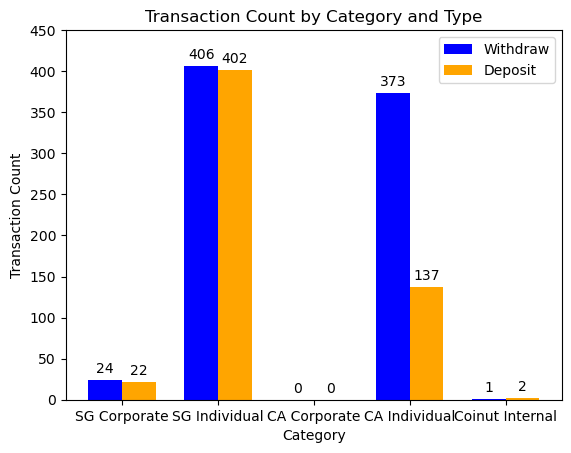

In [10]:
# Set the width of each bar
bar_width = 0.35

# Set the x coordinates for the bars
r1 = range(len(transaction_counts_df))
r2 = [x + bar_width for x in r1]

# Create the dual histogram plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, transaction_counts_df['Withdraw'], color='blue', width=bar_width, label='Withdraw')
rects2 = ax.bar(r2, transaction_counts_df['Deposit'], color='orange', width=bar_width, label='Deposit')
ax.set_ylim(top=450)

# Add labels, title, and legend
ax.set_xlabel('Category')
ax.set_ylabel('Transaction Count')
ax.set_title('Transaction Count by Category and Type')
ax.set_xticks([(r1[i] + r2[i]) / 2 for i in range(len(transaction_counts_df))])
ax.set_xticklabels(transaction_counts_df['Category'])
ax.legend()

# Add number labels to each bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Display the dual histogram plot
plt.show()

# SG corporate users

## Currency distribution

In [11]:
# Filter the DataFrame for SG corporate users
sg_corporate_df = df[sg_corporate_criteria]

# Group the DataFrame by currency and transaction type, and calculate the maximum and average amounts
currency_stats = sg_corporate_df.groupby(['currency', 'Type']).agg({'equiv_sgd_amount': ['max', 'mean']})

# Rename the columns
currency_stats.columns = ['Max Amount in SGD', 'Average Amount in SGD']

# Reset the index to make the currency and type columns regular columns
currency_stats = currency_stats.reset_index()

# Display the table
currency_stats.head(10)

,currency,Type,Max Amount in SGD,Average Amount in SGD
0,BTC,deposit,27278.842486,26037.189766
1,ETH,deposit,16252.583357,9312.079586
2,USDT_ERC20,deposit,92757.569561,40799.106855
3,USDT_ERC20,withdraw,92762.273933,48672.525716
4,USDT_TRC20,deposit,15086.071886,15086.071886
5,USDT_TRC20,withdraw,107185.167052,45900.470166
6,XSGD,deposit,105644.205983,42013.899371
7,XSGD,withdraw,50000.000000,23333.333333


## Transaction (SGD) distribution

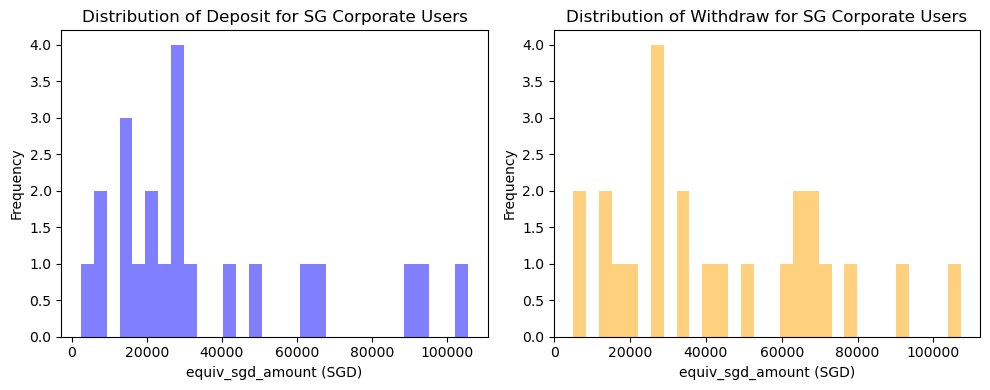

In [12]:
# Separate the DataFrame into subsets based on transaction type
deposit_df = sg_corporate_df[sg_corporate_df['Type'] == 'deposit']
withdraw_df = sg_corporate_df[sg_corporate_df['Type'] == 'withdraw']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the distribution for "deposit"
ax1.hist(deposit_df['equiv_sgd_amount'], bins=30, color='blue', alpha=0.5)
ax1.set_xlabel('equiv_sgd_amount (SGD)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Deposit for SG Corporate Users')

# Plot the distribution for "withdraw"
ax2.hist(withdraw_df['equiv_sgd_amount'], bins=30, color='orange', alpha=0.5)
ax2.set_xlabel('equiv_sgd_amount (SGD)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Withdraw for SG Corporate Users')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# SG individual users


## Curreny distribution

In [18]:
# Filter the DataFrame for SG individual users
sg_individual_df = df[sg_individual_criteria]

# Group the DataFrame by currency and transaction type, and calculate the maximum and average amounts
currency_stats = sg_individual_df.groupby(['currency', 'Type']).agg({'equiv_sgd_amount': ['max', 'mean']})

# Rename the columns
currency_stats.columns = ['Max Amount in SGD', 'Average Amount in SGD']

# Reset the index to make the currency and type columns regular columns
currency_stats = currency_stats.reset_index()

# Display the table
currency_stats.head(20)

,currency,Type,Max Amount in SGD,Average Amount in SGD
0,BTC,deposit,7925.234870,2478.159555
1,BTC,withdraw,38942.925182,4057.908958
2,DAI,deposit,11780.177263,11780.177263
3,DAI,withdraw,11763.991625,6114.927853
4,ETC,deposit,827.730952,422.987583
5,ETH,deposit,1489.015282,465.815238
6,ETH,withdraw,4013.752237,1553.680869
7,LTC,deposit,189.018693,132.988390
8,LTC,withdraw,16537.990173,1264.612382
9,SGD,deposit,35000.000000,2005.759605


In [19]:
sg_individual_counts = df[(df['equiv_sgd_amount'] < 20000) & sg_individual_criteria]['Type'].value_counts()

print(sg_individual_counts)

withdraw    394
deposit     386
Name: Type, dtype: int64


## Transaction (SGD) distribution

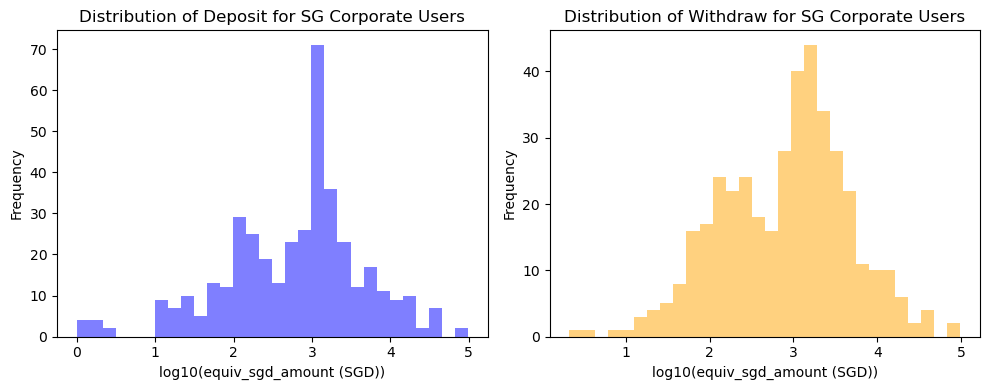

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Separate the DataFrame into subsets based on transaction type
deposit_df = sg_individual_df[sg_individual_df['Type'] == 'deposit']
withdraw_df = sg_individual_df[sg_individual_df['Type'] == 'withdraw']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the distribution for "deposit"
ax1.hist(np.log10(deposit_df['equiv_sgd_amount']), bins=30, color='blue', alpha=0.5)
ax1.set_xlabel('log10(equiv_sgd_amount (SGD))')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Deposit for SG Corporate Users')

# Plot the distribution for "withdraw"
ax2.hist(np.log10(withdraw_df['equiv_sgd_amount']), bins=30, color='orange', alpha=0.5)
ax2.set_xlabel('log10(equiv_sgd_amount (SGD))')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Withdraw for SG Corporate Users')


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# CA individual users

## Curreny distribution

In [20]:
# Filter the DataFrame for SG individual users
ca_individual_df = df[ca_individual_criteria]

# Group the DataFrame by currency and transaction type, and calculate the maximum and average amounts
currency_stats = ca_individual_df.groupby(['currency', 'Type']).agg({'equiv_sgd_amount': ['max', 'mean']})

# Rename the columns
currency_stats.columns = ['Max Amount in SGD', 'Average Amount in SGD']

# Reset the index to make the currency and type columns regular columns
currency_stats = currency_stats.reset_index()

# Display the table
currency_stats.head(20)

,currency,Type,Max Amount in SGD,Average Amount in SGD
0,BTC,deposit,75.023412,36.642094
1,BTC,withdraw,1592.402803,229.559868
2,ETC,deposit,44.264343,28.222743
3,ETC,withdraw,47.633271,16.997349
4,ETH,deposit,2746.730327,949.908563
5,ETH,withdraw,111.387130,111.387130
6,LTC,deposit,150.050679,22.544618
7,LTC,withdraw,151.627017,8.919839
8,USDT_ERC20,withdraw,1018.139055,771.803596
9,USDT_TRC20,deposit,259.234024,75.475933


## Transaction (SGD) distribution

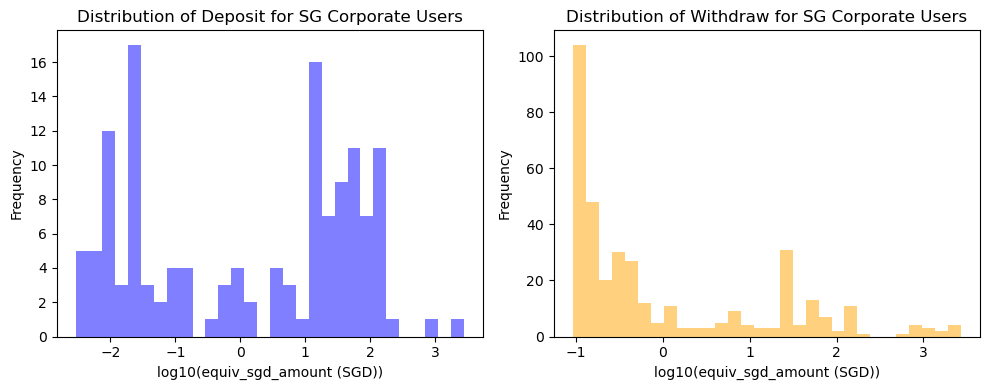

In [16]:
# Separate the DataFrame into subsets based on transaction type
deposit_df = ca_individual_df[ca_individual_df['Type'] == 'deposit']
withdraw_df = ca_individual_df[ca_individual_df['Type'] == 'withdraw']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the distribution for "deposit"
ax1.hist(np.log10(deposit_df['equiv_sgd_amount']), bins=30, color='blue', alpha=0.5)
ax1.set_xlabel('log10(equiv_sgd_amount (SGD))')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Deposit for SG Corporate Users')

# Plot the distribution for "withdraw"
ax2.hist(np.log10(withdraw_df['equiv_sgd_amount']), bins=30, color='orange', alpha=0.5)
ax2.set_xlabel('log10(equiv_sgd_amount (SGD))')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Withdraw for SG Corporate Users')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
